<a href="https://colab.research.google.com/github/Slimkammounmath/Words-of-conjugation-invaraint-permutations/blob/main/Claim_on_the_product_and_the_commutator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assumtions / model

We want to simulate an approximation of the law of the number of fixed points of  $\sigma_n\rho_n$ and of $[\sigma_n,\rho_n]$ when :  

*   $\#_1 (\sigma_n) \sim  \alpha_1\sqrt{n}$

*   $\#_1 (\rho_n) \sim  \alpha_2\sqrt{n}$


*   $\#_2 (\sigma_n) \sim  \beta_1{n}$

*   $\#_2 (\rho_n) \sim  \beta_1{n}$

Here $\#_1$ is the number of fixed points and $\#_2$ is the number of two cycles.


We genererate  a conjugacy invariant permutation with a number of fixed points following  Binomial variable with parameters  $\alpha_i/\sqrt{n}$ and  $n$. Given the number of fixed points, the  number of two-cycles follows the law of  $int(binomial(2\beta_i,n- \#_1(\sigma))/2)$. Finally, $\sigma_n$ have at most one cycle of length >2 
( its lengths is exactyly  $n-\#_1(\sigma_n)-2\#_2(\sigma_n)$).


We present different cases :


1.   Product with all parameters equal to 0.  We proved this case in [[KM2020]](https://projecteuclid.org/journals/electronic-communications-in-probability/volume-25/issue-none/A-product-of-invariant-random-permutations-has-the-same-small/10.1214/20-ECP334.full)
2.   The class of the product of two i.i.d fixed point free involutions. The limiting of the number of cycles of length i seem to be 2Poisson(1/2i)
3.   The commutator with all parameters equal to 0.  We proved this case in [[KM2022]](https://arxiv.org/abs/2204.04759)
4.   The general case for the product
5.   The commutator when $\alpha_2=\beta_2=0$.





# Parameters : 


In [1]:
n=10000 # The size of the permutation
N=2000 # the number of simples

# Generate permutations (one can hide this section)

Step 1: generate the permutations

In [2]:
import numpy as np
from matplotlib import pyplot



def perm(alpha,beta): 
  # choose the set of fixed points
  fixed=[]
  two_cycles=[]   # a list that contains the points that will be in a two cycles
  complement=[]
  fixed_points_boolean=np.random.binomial(1, alpha/np.sqrt(n), size=n)  # the number of fixed points ~ Bin (alpha/np.sqrt(n), n)  
  Q=np.random.binomial(1, 2*beta, size=n)    # here Q[i]=1 if sigma^2(i)=i

  for i in range(n):
     if fixed_points_boolean[i]==1:
        fixed.append(i)
     elif Q[i]==1:   # the number of two cycles ~ int(Bin(2 beta, n - #1)/2)
        two_cycles.append(i)   
     else: 
        complement.append(i)
  if len(two_cycles)%2==1: 
    random_position= np.random.randint(len(two_cycles))
    complement.append(two_cycles[random_position])   
    np.delete(two_cycles,random_position)
  two_cycles=np.random.permutation(two_cycles)
  complement=np.random.permutation(complement)
  ## construct permutation : 
  final_perm=np.zeros(n)
  final_inverse=np.zeros(n)

  for i in fixed:
    final_perm[i]=i
    final_inverse[i]=i

  for i in range(int(len(two_cycles)/2)):
    final_perm[two_cycles[2*i]]=two_cycles[2*i+1]
    final_perm[two_cycles[2*i+1]]=two_cycles[2*i]
    final_inverse[two_cycles[2*i]]=two_cycles[2*i+1]
    final_inverse[two_cycles[2*i+1]]=two_cycles[2*i]
    
  for i in range(len(complement)-1):
    final_perm[complement[i]]= complement[i+1]
    final_inverse[complement[i+1]]= complement[i]
    
  if len(complement)>0:
    final_perm[complement[-1]]=complement[0]
    final_inverse[complement[0]]=complement[-1]


  return([final_perm.astype(int),final_inverse.astype(int)])



In [3]:
def generate_product(alpha,beta,alpha_prime,beta_prime):
    sigma=perm(alpha,beta)[0]
    rho=perm(alpha_prime,beta_prime)[0]
    product=[sigma[rho[i]] for i in range(n)]
    fixed_points=0
    two_cycles=0
    three_cycles=0
    for i in range(n):
      if product[i]==i:
        fixed_points+=1
      elif product[product[i]]==i:
        two_cycles+=0.5
      elif product[product[product[i]]]==i:
        three_cycles+=1.0/3
    return(n,fixed_points,two_cycles,round(three_cycles))

def generate_commutator(alpha,beta,alpha_prime,beta_prime):
    [sigma,sigma_inv]=perm(alpha,beta)
    [rho,rho_inv]=perm(alpha_prime,beta_prime)
    ## for test
 ##   print([sigma[sigma_inv[i]] for i in range(n)])
    commutator=[sigma[rho[sigma_inv[rho_inv[i]]]] for i in range(n)]
    fixed_points=0
    two_cycles=0
    three_cycles=0
    for i in range(n):
      if commutator[i]==i:
        fixed_points+=1
      elif commutator[commutator[i]]==i:
        two_cycles+=0.5
      elif commutator[commutator[commutator[i]]]==i:              
        three_cycles+=1.0/3
    return(commutator,fixed_points,two_cycles,round(three_cycles))


# First case : product ($\alpha_1=\beta_1=\alpha_2=\beta_2=0$)

In [4]:
product_list=[generate_product(0,0,0,0) for i in range(N)]
fixed_points_series=[]
two_cycles_series=[]
three_cycles_series=[]

for product in product_list: 
  fixed_points_series.append(product[1])
  two_cycles_series.append(product[2])
  three_cycles_series.append(product[3])


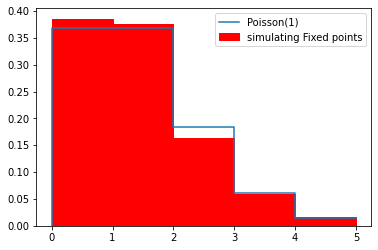

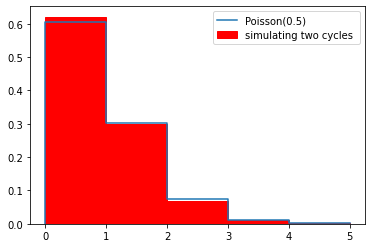

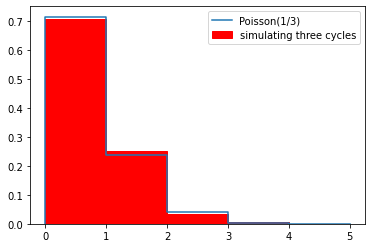

In [5]:


pyplot.hist(fixed_points_series, range = (0, 5), bins = 5,density=True,color="red",edgecolor="red",label="simulating Fixed points")
pyplot.step([0,1,2,3,4,5], [0,np.exp(-1),np.exp(-1),np.exp(-1)*1.0/2,np.exp(-1)*1.0/6,np.exp(-1)*1.0/24], where='pre',label="Poisson(1)")
pyplot.legend()
pyplot.show()



pyplot.hist(two_cycles_series, range = (0, 5), bins = 5,density=True,color="red",edgecolor="red",label="simulating two cycles ")
pyplot.step([0,1,2,3,4,5], [0]+[0.5**i/(np.math.factorial(i)*np.exp(0.5) ) for i in range(5)], where='pre',label="Poisson(0.5)")

pyplot.legend()
pyplot.show()


pyplot.hist(three_cycles_series, range = (0, 5), bins = 5,density=True,color="red",edgecolor="red",label="simulating three cycles")
pyplot.step([0,1,2,3,4,5], [0]+[1.0/(3**i)/(np.math.factorial(i)*np.exp(1.0/3) ) for i in range(5)], where='pre',label="Poisson(1/3)")

pyplot.legend()
pyplot.show()


# Second  Case Product : $\alpha=0;\beta=0.5$ (Fixed points ~ 2Poisson(1/2))


In [6]:
product_list=[generate_product(0,0.5,0,0.5) for i in range(N)]
fixed_points_series=[]
two_cycles_series=[]
three_cycles_series=[]

for product in product_list: 
  fixed_points_series.append(product[1])
  two_cycles_series.append(product[2])
  three_cycles_series.append(product[3])

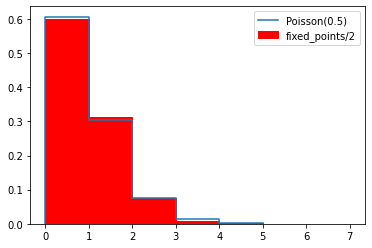

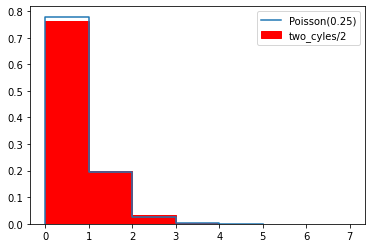

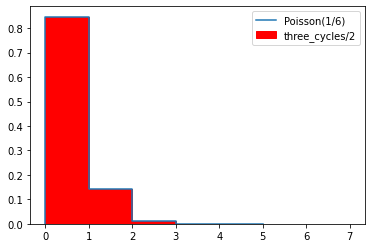

2000

In [7]:
from matplotlib import pyplot
#pyplot.hist(fixed_points_series, range = (0, 7), bins = 7,density=True,color="red",edgecolor="red",label="simulating")

#pyplot.show()
fixed_points_series=np.array(fixed_points_series)/2.0
pyplot.hist(fixed_points_series, range = (0, 7), bins = 7,density=True,color="red",edgecolor="red",label="fixed_points/2")
pyplot.step([0,1,2,3,4,5], [0]+[0.5**i/(np.math.factorial(i)*np.exp(0.5) ) for i in range(5)], where='pre',label="Poisson(0.5)")
pyplot.legend()

pyplot.show()


#pyplot.hist(two_cycles_series, range = (0, 7), bins = 7,density=True,color="red",edgecolor="red",label="simulating")
#pyplot.legend()
#pyplot.show()

two_cycles_series=np.array(two_cycles_series)/2.0
pyplot.hist(two_cycles_series, range = (0, 7), bins = 7,density=True,color="red",edgecolor="red",label="two_cyles/2")
pyplot.step([0,1,2,3,4,5], [0]+[0.25**i/(np.math.factorial(i)*np.exp(0.25) ) for i in range(5)], where='pre',label="Poisson(0.25)")
pyplot.legend()

pyplot.show()

#pyplot.hist(three_cycles_series, range = (0, 7), bins = 7,density=True,color="red",edgecolor="red",label="simulating")

#pyplot.show()
three_cycles_series=np.array(three_cycles_series)/2.0
pyplot.hist(three_cycles_series, range = (0, 7), bins = 7,density=True,color="red",edgecolor="red",label="three_cycles/2")
pyplot.step([0,1,2,3,4,5], [0]+[1.0/6**i/(np.math.factorial(i)*np.exp(1.0/6) ) for i in range(5)], where='pre',label="Poisson(1/6)")
pyplot.legend()

pyplot.show()

len(three_cycles_series)

# Third case : commutator $\alpha=\beta=0$ (fixed points Poisson(1))


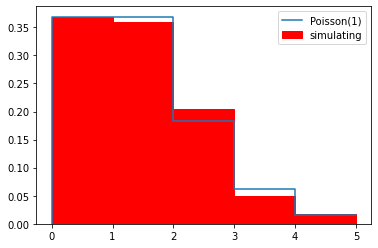

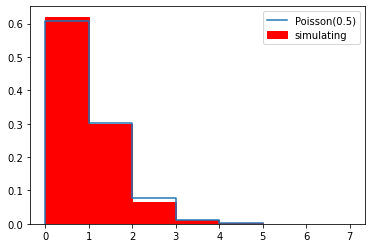

In [8]:
fixed_points_series=[generate_commutator(0,0,0,0)[1] for i in range(N)]
two_cycles_series=[generate_commutator(0,0,0,0)[2] for i in range(N)]


pyplot.hist(fixed_points_series, range = (0, 5), bins = 5,density=True,color="red",edgecolor="red",label="simulating")
pyplot.step([0,1,2,3,4,5], [0,np.exp(-1),np.exp(-1),np.exp(-1)*1.0/2,np.exp(-1)*1.0/6,np.exp(-1)*1.0/24], where='pre',label="Poisson(1)")
pyplot.legend()
pyplot.show()
#pyplot.hist(fixed_points_series, range = (0, 5), bins = 5,density=True,cumulative=True,color="red",edgecolor="red",label="simulating")
#pyplot.step([0,1,2,3,4,5], [0,np.exp(-1),np.exp(-1)*(1+1),np.exp(-1)*(1+1+1.0/2),np.exp(-1)*(1+1+1.0/2+1.0/6),np.exp(-1)*(1+1+1.0/2+1.0/6+1.0/24)], where='pre',label="Poisson(1)")
pyplot.show()


pyplot.hist(two_cycles_series, range = (0, 7), bins = 7,density=True,color="red",edgecolor="red",label="simulating")
pyplot.step([0,1,2,3,4,5], [0]+[0.5**i/(np.math.factorial(i)*np.exp(0.5) ) for i in range(5)], where='pre',label="Poisson(0.5)")
pyplot.legend()

pyplot.show()

#Forth case : Product (general case)

In [9]:
alpha1 = 0.75
alpha2= 1
beta1=0.3
beta2=0.4
product_list=[]
fixed_points_series=[generate_product(alpha1,beta1,alpha2,beta2)[1] for i in range(N)]

a= alpha1*alpha2 + (1-4*beta1*beta2)
b= 2*beta1*beta2
New_law=[2*np.random.poisson(b)+np.random.poisson(a) for i in range(1000000)]

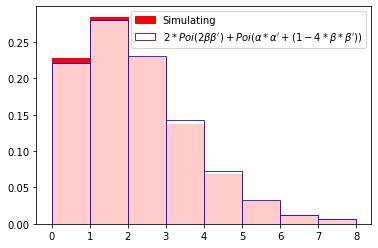

In [10]:
m=max(fixed_points_series)
pyplot.hist(fixed_points_series, range = (0, m), bins = m,density=True,color="red",edgecolor="red",label="Simulating")
pyplot.hist(New_law, range = (0, m), bins = m,density=True,color="white",edgecolor="blue",label=r'$2*Poi(2\beta\beta^\prime)+Poi(\alpha*\alpha^\prime + (1-4*\beta*\beta^\prime))$',alpha=0.8)

pyplot.legend()
pyplot.show()


#Fifth case : Commutator (alpha_2=beta_2=0)

In [11]:
alpha1 = 0.75
alpha2= 0
beta1=0.2
beta2=0
product_list=[]
fixed_points_series=[generate_commutator(alpha1,beta1,alpha2,beta2)[1] for i in range(N)]

a= alpha1**2 + (1-4*beta1**2)
b= 2*beta1**2
New_law=[2*np.random.poisson(b)+np.random.poisson(a) for i in range(1000000)]

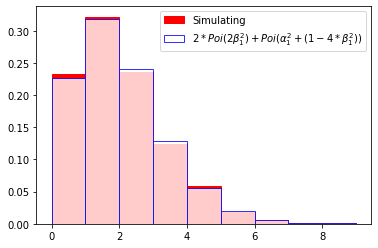

In [12]:
m=max(fixed_points_series)
pyplot.hist(fixed_points_series, range = (0, m), bins = m,density=True,color="red",edgecolor="red",label="Simulating")
pyplot.hist(New_law, range = (0, m), bins = m,density=True,color="white",edgecolor="blue",label=r'$2*Poi(2\beta_1^2)+Poi(\alpha_1^2 + (1-4*\beta_1^2))$',alpha=0.8)

pyplot.legend()
pyplot.show()